In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palette = ['#148cb4', '#fcd464', '#f48c6c', '#ec446c', '#041c14', '#84d484', '#043c4c', '#0c6c8c', '#04d4a4']
sns.set_palette(palette)
pd.options.mode.chained_assignment = None  # default='warn'

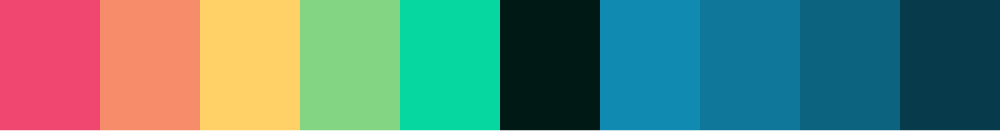

In [32]:
exchange_rates = pd.read_csv('../midterm2.2-data/euro-daily-hist_1999_2022.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


In [33]:
# Change the column names to snake case
def to_snake_case(text):
    """
    Convert text to snake case
    """
    text = text.strip(' []')
    text = text.lower()
    text = text.replace(' ', '_')
    return text

new_names = [to_snake_case(col) for col in exchange_rates.columns]
exchange_rates.columns = ['time'] + new_names[1:]
exchange_rates.head()

,time,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan_renminbi,cypriot_pound,czech_koruna,danish_krone,...,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


In [34]:
# Process data type
exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])
exchange_rates.set_index('time', inplace=True)

# Change all num to float
for col in exchange_rates.columns:
    exchange_rates[col] = pd.to_numeric(exchange_rates[col], errors='coerce')

exchange_rates.sort_index(inplace=True)

# Fill missing values
exchange_rates.fillna(method='ffill', inplace=True, limit=3)
# exchange_rates.fillna(method='bfill', inplace=True, limit=3)

exchange_rates.head()

,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan_renminbi,cypriot_pound,czech_koruna,danish_krone,estonian_kroon,...,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
time,,,,,,,,,,,,,,,,,,,,,
1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,...,1.3111,25.2875,9.4696,1.9554,189.045,42.991,42.6799,0.3723,1.1789,6.9358
1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,...,1.3168,26.5876,9.4025,1.9655,188.775,42.848,42.5048,0.3728,1.1790,6.7975
1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,...,1.3168,27.4315,9.3050,1.9699,188.700,42.778,42.6949,0.3722,1.1743,6.7307
1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,...,1.3092,26.9876,9.1800,1.9436,188.800,42.765,42.1678,0.3701,1.1632,6.8283
1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,...,1.3143,27.2075,9.1650,1.9537,188.840,42.560,42.5590,0.3718,1.1659,6.7855


In [35]:
euro_to_dollar = exchange_rates[['us_dollar']].copy()
euro_to_dollar['rolling_mean'] = euro_to_dollar['us_dollar'].rolling(30).mean()
euro_to_dollar.head()

,us_dollar,rolling_mean
time,,
1999-01-04,1.1789,NaN
1999-01-05,1.1790,NaN
1999-01-06,1.1743,NaN
1999-01-07,1.1632,NaN
1999-01-08,1.1659,NaN


In [36]:
interest_rates = pd.read_csv('../midterm2.2-data/WB_intereset_rate.csv', skiprows=4)
us_interest = interest_rates[interest_rates['Country Name'] == 'United States']
us_interest = us_interest.loc[:, '1999':'2022'].T
us_interest.columns = ['interest_rate']

us_interest['time'] = pd.to_datetime(us_interest.index, format='%Y')
us_interest = us_interest[['time', 'interest_rate']]
us_interest.head()

,time,interest_rate
1999,1999-01-01,6.493426
2000,2000-01-01,6.813424
2001,2001-01-01,4.565848
2002,2002-01-01,3.068643
2003,2003-01-01,2.107311


In [37]:
def annotate_max_min(df, col_name):
    highest = df[col_name].max()
    highest_date = df[df[col_name] == highest].index[0]
    lowest = df[col_name].min()
    lowest_date = df[df[col_name] == lowest].index[0]
    plt.scatter(pd.Timestamp(highest_date), highest, color='red', marker='o') # Highest point marker
    plt.scatter(pd.Timestamp(lowest_date), lowest, color='red', marker='o')
    plt.annotate(f'Highest ({round(highest, 2)})', 
                xy=(pd.Timestamp(highest_date), highest), 
                xytext=(pd.Timestamp(highest_date), highest + 0.04),
                bbox=dict(facecolor='white', alpha=0.75))

    plt.annotate(f'Lowest ({round(lowest, 2)})', 
                xy=(pd.Timestamp(lowest_date), lowest), 
                xytext=(pd.Timestamp(lowest_date), lowest - 0.04),
                bbox=dict(facecolor='white', alpha=0.75))
    

def annotate_event(y_cord):
    """
    Annotate the event:
    - Early 2000s - Dot-com Bubble and Subsequent Recovery
    - Mid-2000s - Pre-Financial Crisis Growth
    - 2008 Financial Crisis
    - Post-2008 - Eurozone Debt Crisis and Recovery
    - 2020 - COVID-19 Pandemic
    - 2021 - Recovery
    - Recent Years - Brexit, COVID-19, and Geopolitical Tensions
    """

    # Modifying the data to include start and end dates
    data = {
        'start_date': ['2000-10-26', '2008-07-15', '2009-01-01', '2010-01-01', '2016-06-23', '2020-01-01'],
        'end_date': ['2000-10-26', '2008-07-15', '2010-01-01', '2012-12-31', '2020-01-01', '2023-05-26'],
        'event_name': [
            'Dot-com Bubble Burst',
            '2008 Financial Crisis Peak',
            'Post-2008 Economic Fluctuations',
            'Eurozone Debt Crisis',
            'Brexit Referendum',
            'COVID-19 Pandemic'
        ],
        'event_description': [
            'The initial drop in the Euro value can be linked to the strength of the US economy during the dot-com boom and its subsequent bust.',
            'The peak in the Euro value against the USD in 2008 was influenced by the global financial crisis originating in the US.',
            'The period after 2008 saw significant volatility in the Euro value due to the global financial crisis impact and recovery efforts.',
            'Following the financial crisis, the Euro experienced fluctuations due to the Eurozone debt crisis, impacting overall confidence in the Euro.',
            'The Brexit referendum in 2016 introduced significant uncertainty and volatility in the European markets, impacting the Euro value.',
            'The onset of the COVID-19 pandemic in 2020 had a global economic impact, influencing fiscal and monetary policies and affecting the Euro value.'
        ]
    }
    economic_events_df = pd.DataFrame(data)
    economic_events_df['start_date'] = pd.to_datetime(economic_events_df['start_date'], errors='coerce')
    
    event_text_x = y_cord    
    color_range = palette[:economic_events_df.shape[0]]

    # Plot event range
    for i in range(economic_events_df.shape[0]):
        plt.axvspan(economic_events_df['start_date'][i], economic_events_df['end_date'][i], alpha=0.10, color=color_range[i], linewidth=3)
        plt.annotate(economic_events_df['event_name'][i], 
                    xy=(economic_events_df['start_date'][i], 1.1), 
                    xytext=(economic_events_df['start_date'][i], event_text_x[i]),
                    bbox=dict(facecolor=color_range[i], alpha=0.15))
    

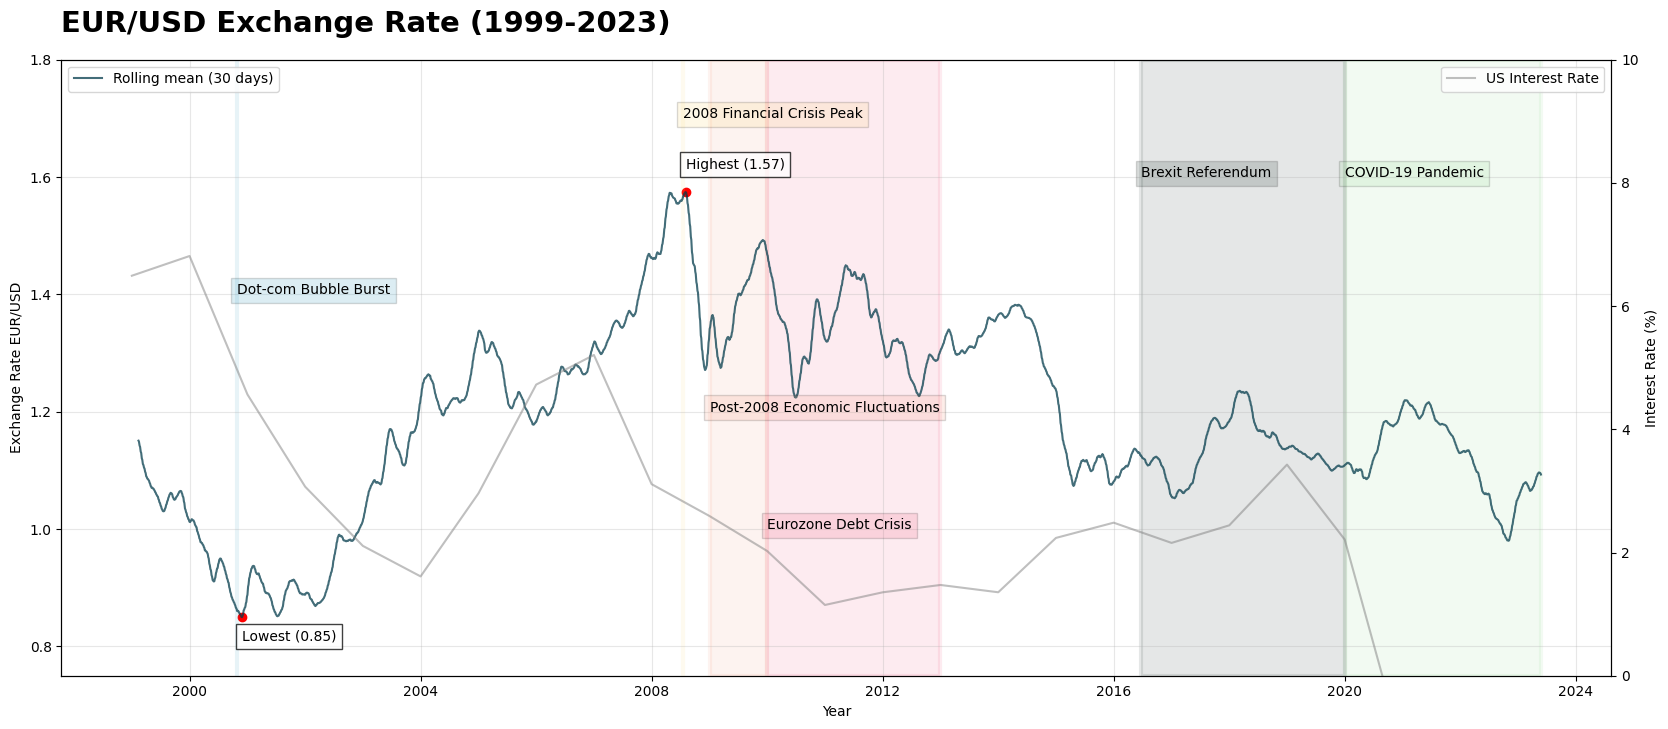

In [49]:
# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
# plt.plot(euro_to_dollar.index, euro_to_dollar['us_dollar'].rolling(365).mean(), color='red', alpha=0.75, label='Rolling mean (365 days)')
plt.plot(euro_to_dollar.index, euro_to_dollar['rolling_mean'], color=palette[6], alpha=0.75, label='Rolling mean (30 days)')
plt.ylim(0.75, 1.8)

# Annotate highest and lowest
annotate_max_min(euro_to_dollar, 'rolling_mean')

# Annotate events
annotate_event([1.4, 1.7, 1.2, 1, 1.6, 1.6])

plt.grid(True, alpha=0.3)
plt.title('EUR/USD Exchange Rate (1999-2023)', fontdict={'fontsize': 21, 'fontweight': 'bold'}, pad=20, loc='left')
plt.xlabel('Year')
plt.ylabel('Exchange Rate EUR/USD')
plt.legend(loc='upper left')

plt.gca().twinx()
plt.plot(us_interest['time'], us_interest['interest_rate'], color='grey', alpha=0.5, label='US Interest Rate')
plt.ylim(0, 10)
plt.ylabel('Interest Rate (%)')
plt.legend(loc='upper right')

plt.show()

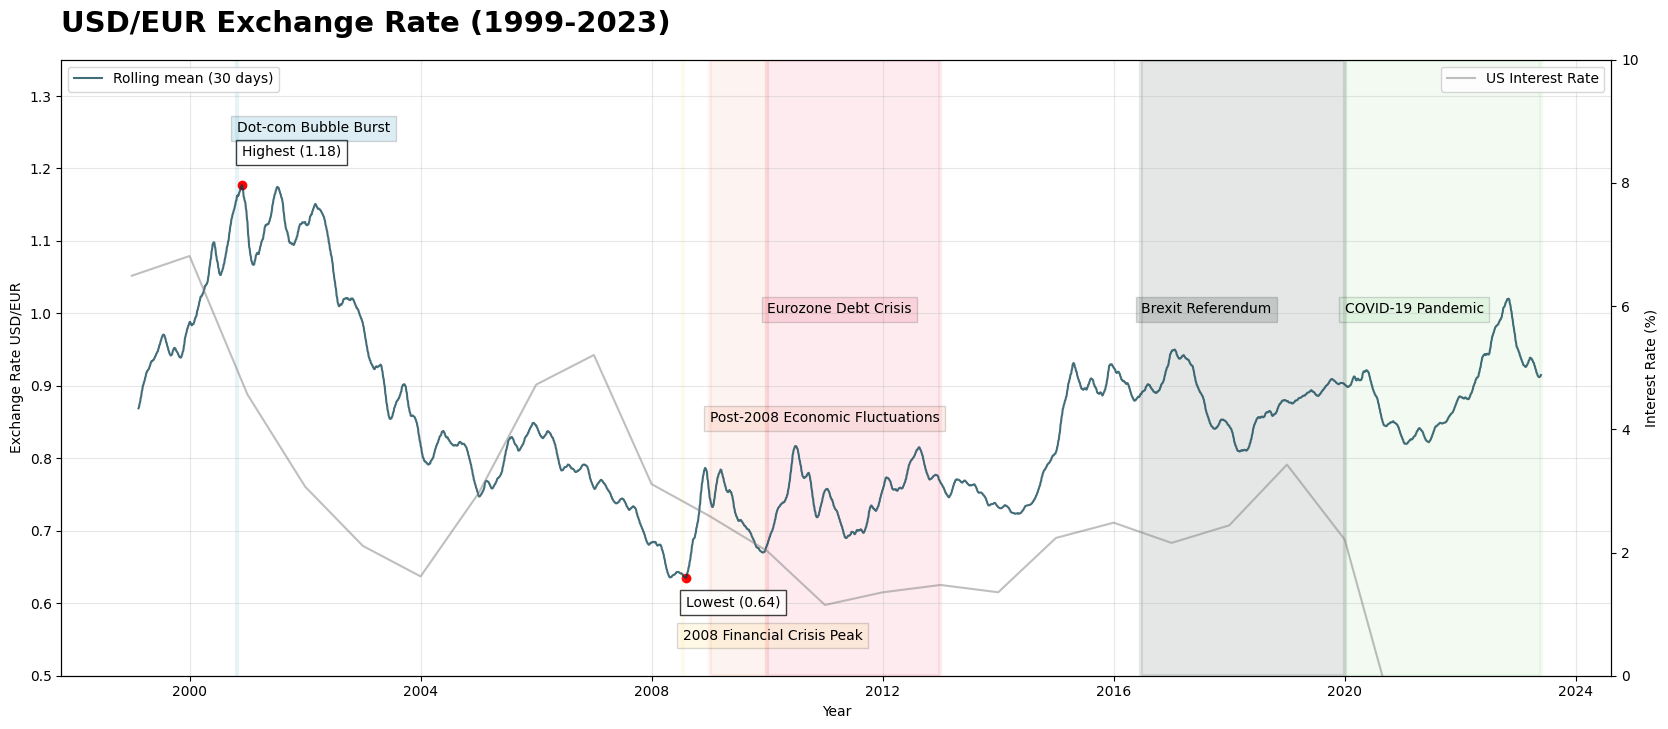

In [50]:
euro_to_dollar['rev_rolling_mean'] = 1/euro_to_dollar['rolling_mean']

# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
# plt.plot(euro_to_dollar.index, euro_to_dollar['us_dollar'].rolling(365).mean(), color='red', alpha=0.75, label='Rolling mean (365 days)')
plt.plot(euro_to_dollar.index, euro_to_dollar['rev_rolling_mean'], color=palette[6], alpha=0.75, label='Rolling mean (30 days)')
plt.ylim(0.5, 1.35)

# Annotate highest and lowest
annotate_max_min(euro_to_dollar, 'rev_rolling_mean')

# Annotate events
annotate_event([1.25, 0.55, 0.85, 1, 1, 1])

plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.title('USD/EUR Exchange Rate (1999-2023)', fontdict={'fontsize': 21, 'fontweight': 'bold'}, pad=20, loc='left')
plt.xlabel('Year')
plt.ylabel('Exchange Rate USD/EUR')

plt.gca().twinx()
plt.plot(us_interest['time'], us_interest['interest_rate'], color='grey', alpha=0.5, label='US Interest Rate')
plt.ylim(0, 10)
plt.ylabel('Interest Rate (%)')
plt.legend(loc='upper right')

plt.show()

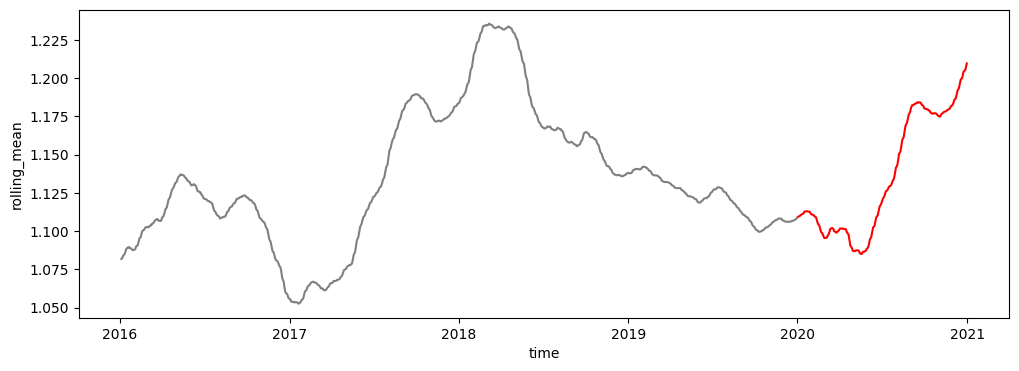

In [40]:
# We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data
# and the 2016-2019 data as a baseline. We can use a line plot.

# 2020 data
euro_to_dollar_2020 = euro_to_dollar.loc['2020']

# 2016-2019 data
euro_to_dollar_2016_2019 = euro_to_dollar.loc['2016':'2019']

# Line plot
plt.figure(figsize=(12, 4))
sns.lineplot(data=euro_to_dollar_2020, x=euro_to_dollar_2020.index, y='rolling_mean', color='red')
sns.lineplot(data=euro_to_dollar_2016_2019, x=euro_to_dollar_2016_2019.index, y='rolling_mean', color='grey')
plt.show()

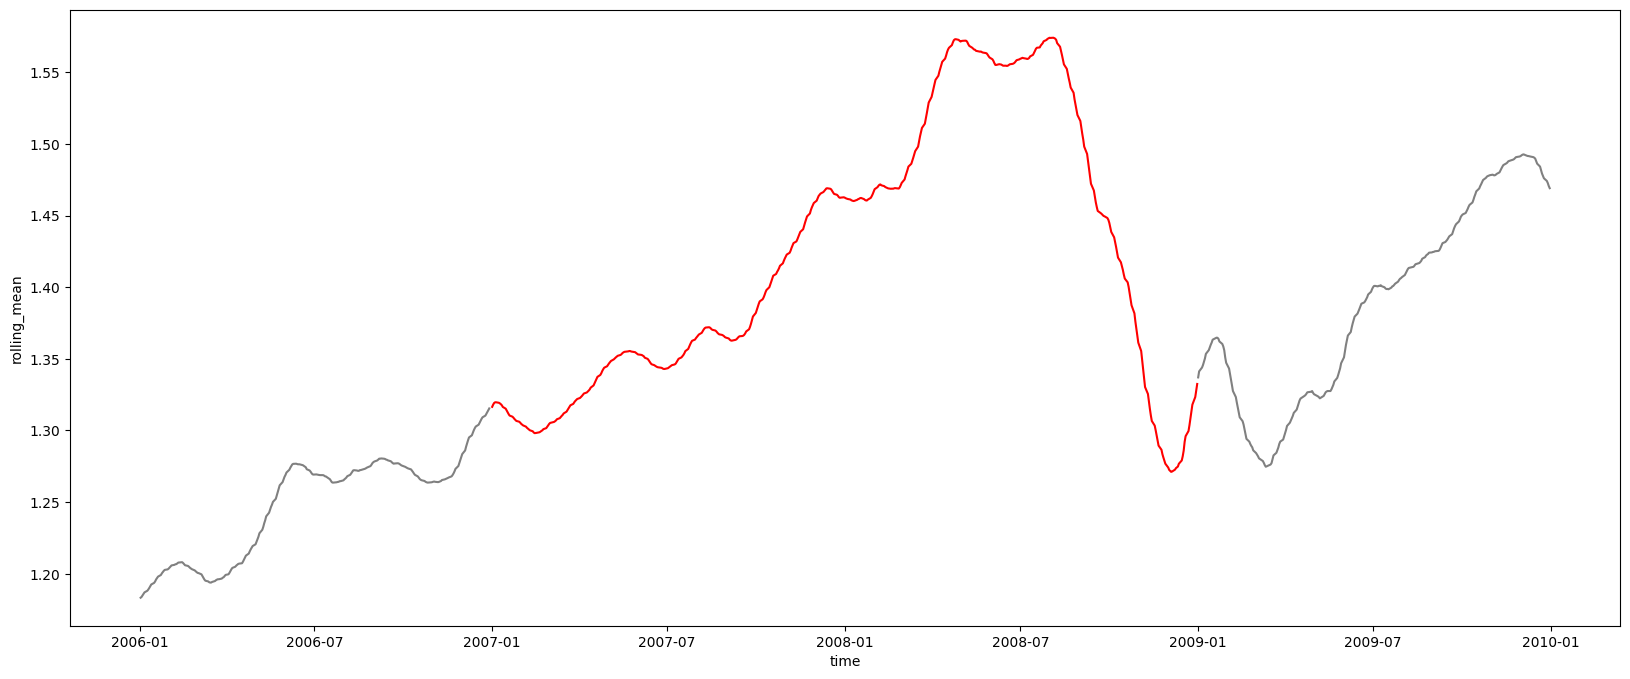

In [41]:
# We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for
# 2006 and 2009 for comparison. We can use a line plot.

# 2006 data
euro_to_dollar_2006 = euro_to_dollar.loc['2006']

# 2007-2008 data
euro_to_dollar_2007_2008 = euro_to_dollar.loc['2007':'2008']

# 2009 data
euro_to_dollar_2009 = euro_to_dollar.loc['2009']

# Line plot
plt.figure(figsize=(20, 8))
sns.lineplot(data=euro_to_dollar_2006, x=euro_to_dollar_2006.index, y='rolling_mean', color='grey')
sns.lineplot(data=euro_to_dollar_2007_2008, x=euro_to_dollar_2007_2008.index, y='rolling_mean', color='red')
sns.lineplot(data=euro_to_dollar_2009, x=euro_to_dollar_2009.index, y='rolling_mean', color='grey')
plt.show()

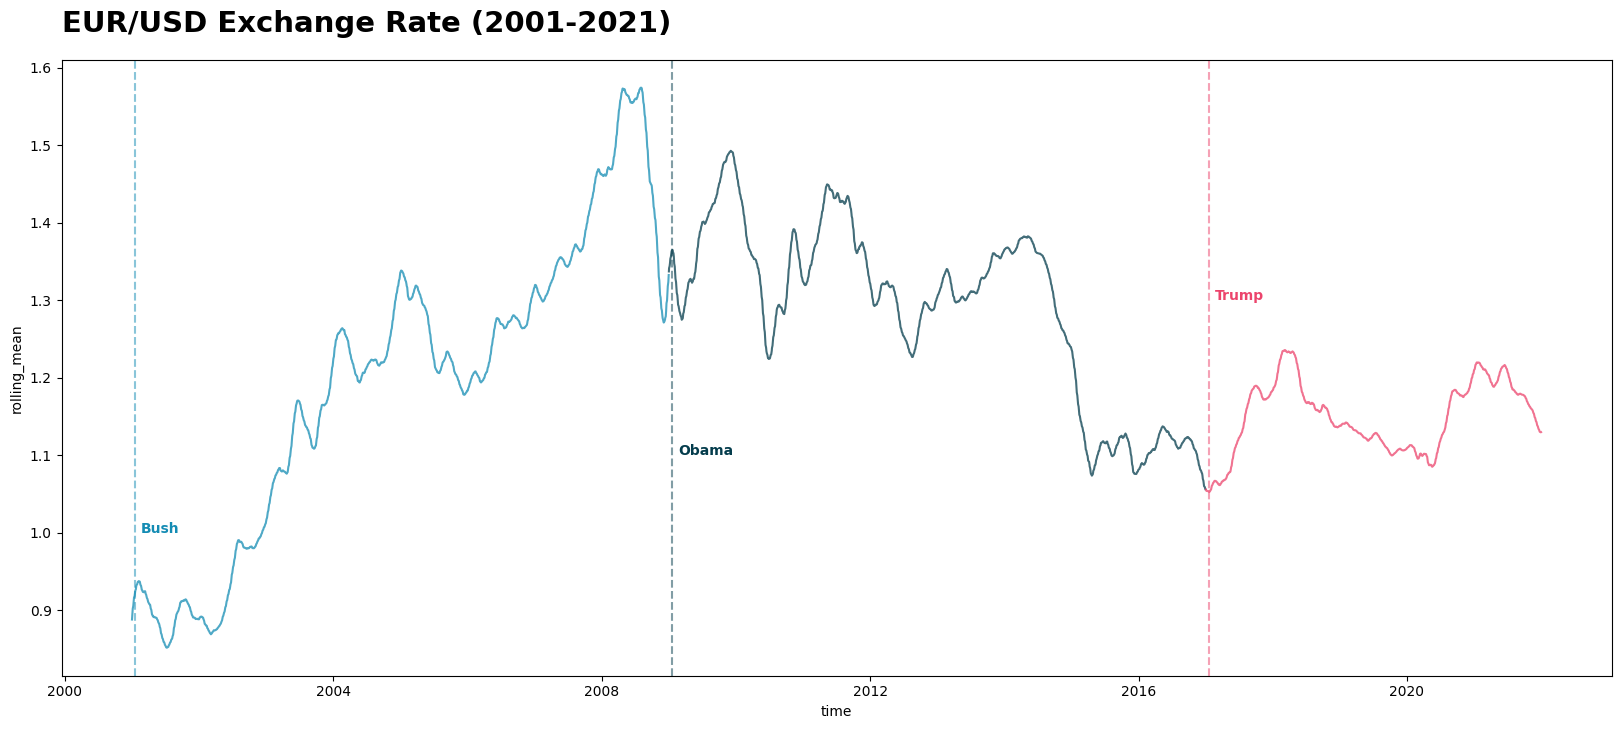

In [54]:
# We show comparatively how the euro-dollar rate changed under the last three US presidents (George W.Bush
# (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021). We can use a line plot.

# 2001-2008 data
euro_to_dollar_2001_2008 = euro_to_dollar.loc['2001':'2008']

# 2009-2016 data
euro_to_dollar_2009_2016 = euro_to_dollar.loc['2009':'2016']

# 2017-2021 data
euro_to_dollar_2017_2021 = euro_to_dollar.loc['2017':'2021']

# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=euro_to_dollar_2001_2008, x=euro_to_dollar_2001_2008.index, y='rolling_mean', color=palette[0], alpha=0.75)
sns.lineplot(data=euro_to_dollar_2009_2016, x=euro_to_dollar_2009_2016.index, y='rolling_mean', color=palette[6], alpha=0.75)
sns.lineplot(data=euro_to_dollar_2017_2021, x=euro_to_dollar_2017_2021.index, y='rolling_mean', color=palette[3], alpha=0.75)

# Reference line of datetime
ax.axvline(pd.to_datetime('2001-01-20'), color=palette[0], linestyle='--', alpha=0.5, label='Bush')
ax.axvline(pd.to_datetime('2009-01-20'), color=palette[6], linestyle='--', alpha=0.5, label='Obama')
ax.axvline(pd.to_datetime('2017-01-20'), color=palette[3], linestyle='--', alpha=0.5, label='Trump')

# Annotate value
ax.text(pd.to_datetime('2001-02-20'), 1, 'Bush', color=palette[0], weight='bold')
ax.text(pd.to_datetime('2009-02-20'), 1.1, 'Obama', color=palette[6], weight='bold')
ax.text(pd.to_datetime('2017-02-20'), 1.3, 'Trump', color=palette[3], weight='bold')

plt.title('EUR/USD Exchange Rate (2001-2021)', fontdict={'fontsize': 21, 'fontweight': 'bold'}, pad=20, loc='left')
plt.show()

In [43]:
# Export the data
euro_to_dollar.to_csv('euro_to_dollar.csv')

In [44]:
us_inflation = pd.read_excel('../midterm2.2-data/statistic_id191077_us-annual-inflation-rate-1990-2022.xlsx', sheet_name='Data', skiprows=5)
us_inflation = us_inflation.iloc[8:, 1:3]
us_inflation.columns = ['time', 'inflation_rate']
us_inflation['time'] = us_inflation['time'].astype(str).str.zfill(2)
us_inflation['time'] = pd.to_datetime(us_inflation['time'], format='%y')
us_inflation.head()

,time,inflation_rate
8,1999-01-01,2.2
9,2000-01-01,3.4
10,2001-01-01,2.8
11,2002-01-01,1.6
12,2003-01-01,2.3


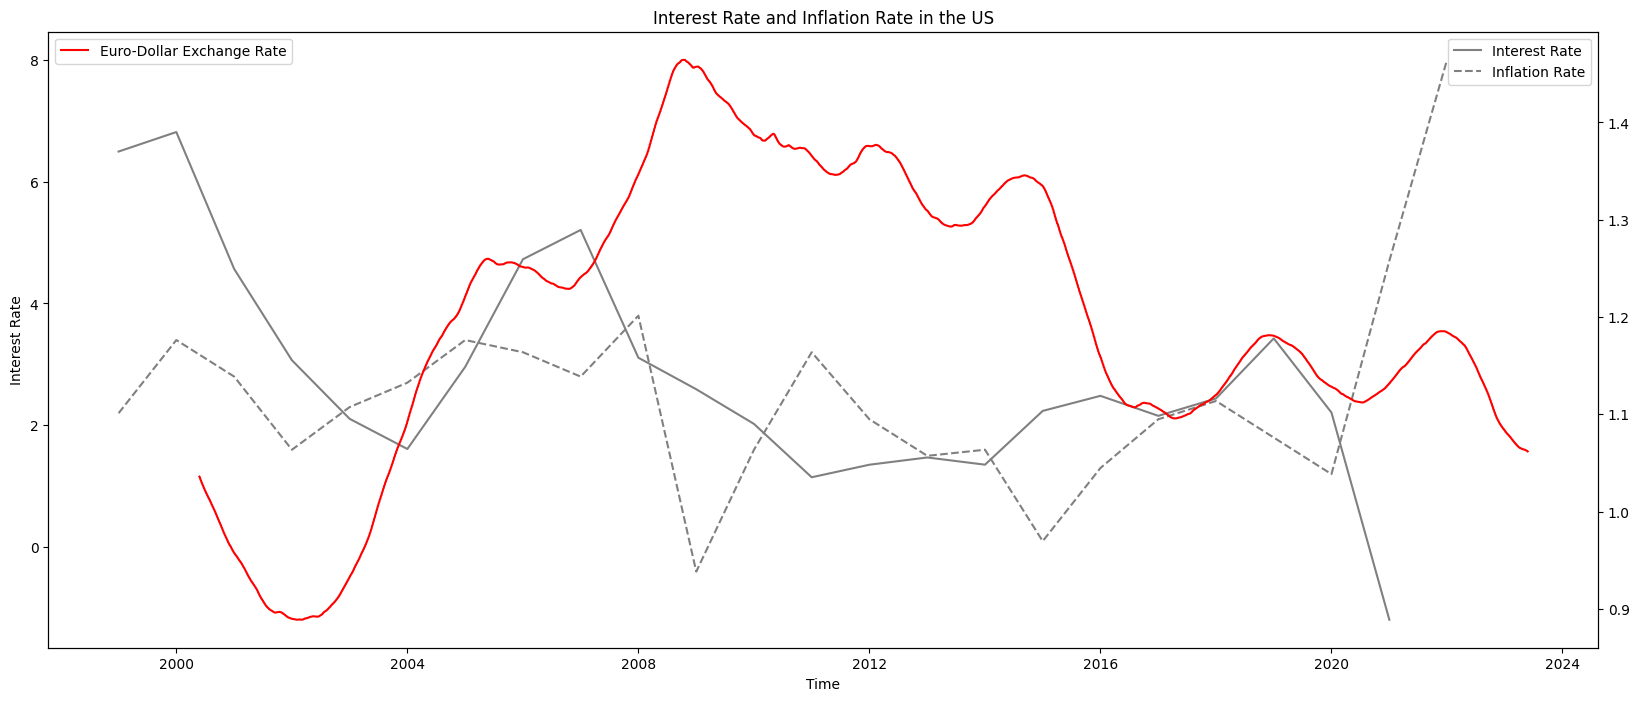

In [45]:
fig, ax = plt.subplots(figsize=(20, 8))
ax1 = ax.twinx()

ax.plot(us_interest['time'], us_interest['interest_rate'], color='grey', label='Interest Rate')
ax.plot(us_inflation['time'], us_inflation['inflation_rate'], color='grey', linestyle='--', label='Inflation Rate')
ax1.plot(euro_to_dollar.index, euro_to_dollar['us_dollar'].rolling(365).mean(), color='red')


ax.set_xlabel('Time')
ax.set_ylabel('Interest Rate')
ax.set_title('Interest Rate and Inflation Rate in the US')
ax.legend(loc='upper right')
ax1.legend(['Euro-Dollar Exchange Rate'], loc='upper left')

plt.show()

# Continents

In [46]:
# Categorizing the given currencies by continent and storing them in a dictionary

currencies_by_continent = {
    "Oceania": ["australian_dollar", "new_zealand_dollar"],
    "Europe": [
        "bulgarian_lev", "swiss_franc", "cypriot_pound", "czech_koruna", 
        "danish_krone", "estonian_kroon", "uk_pound_sterling", "greek_drachma", 
        "croatian_kuna", "hungarian_forint", "iceland_krona", "lithuanian_litas", 
        "latvian_lats", "maltese_lira", "norwegian_krone", "polish_zloty", 
        "romanian_leu", "russian_rouble", "swedish_krona", "slovenian_tolar", 
        "slovak_koruna", "turkish_lira"
    ],
    "South America": ["brazilian_real"],
    "North America": ["canadian_dollar", "mexican_peso", "us_dollar"],
    "Asia": [
        "chinese_yuan_renminbi", "hong_kong_dollar", "indonesian_rupiah", 
        "israeli_shekel", "indian_rupee", "japanese_yen", "korean_won", 
        "malaysian_ringgit", "philippine_peso", "singapore_dollar", "thai_baht"
    ],
    "Africa": ["south_african_rand"]
}

# Reversing the key-value pairs in the dictionary
# Each currency will now be a key and the continent will be its value

reversed_dict = {}
for continent, currencies in currencies_by_continent.items():
    for currency in currencies:
        reversed_dict[currency] = continent

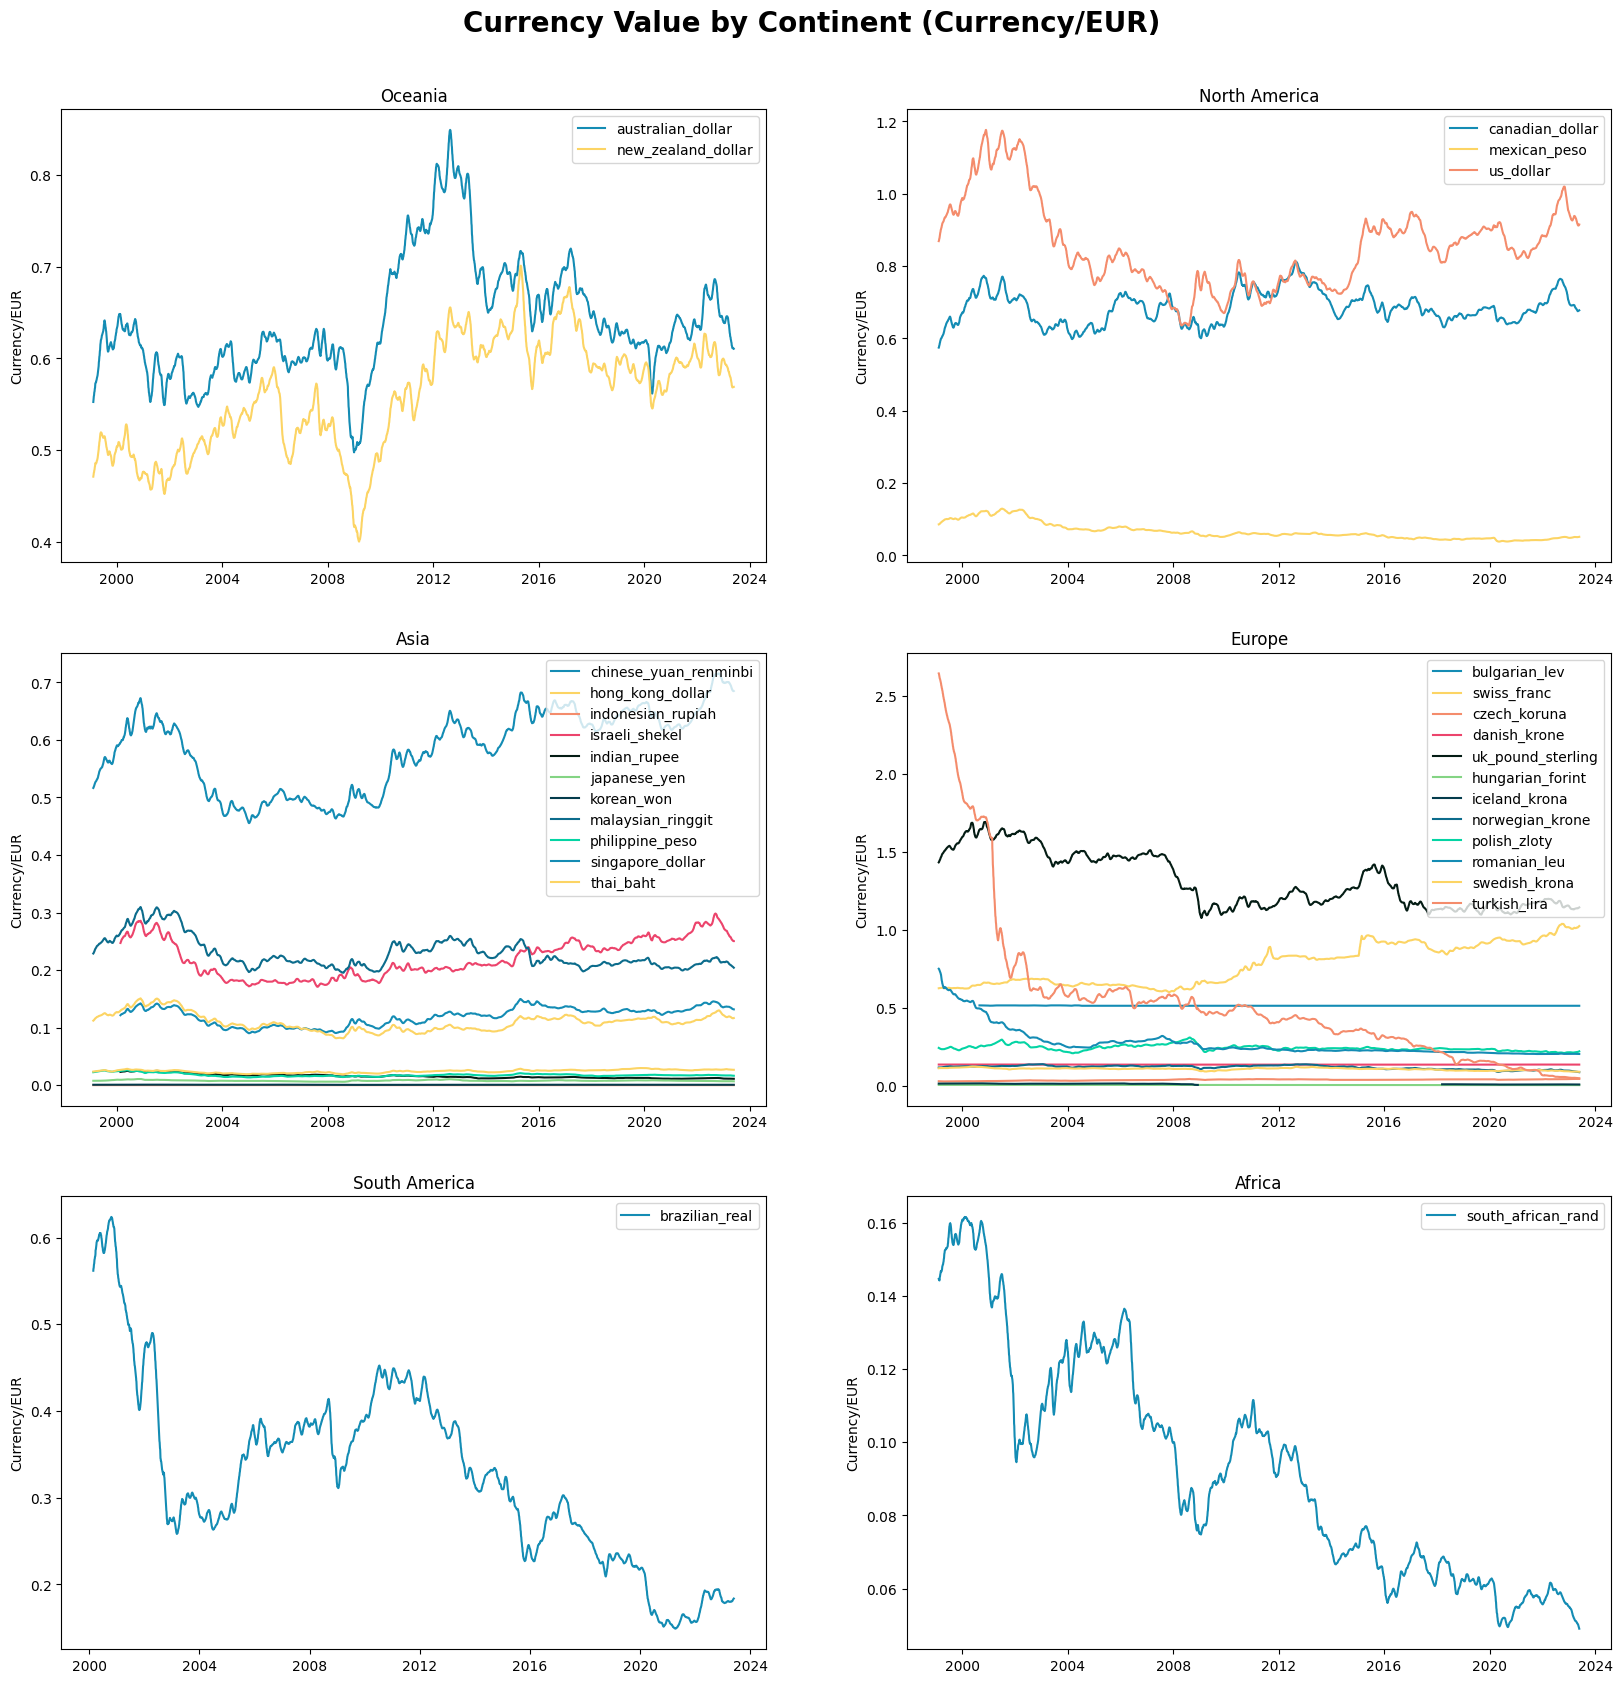

In [47]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle('Currency Value by Continent (Currency/EUR)', fontsize=20, fontweight='bold', y=0.93)

r = c = 0
for key, value in currencies_by_continent.items():
    for currency in value:
        if exchange_rates[currency].iloc[-1].astype(str) != 'nan':
            # Plot percentage change

            ax[r, c].plot(1/exchange_rates[currency].rolling(30).mean(), label=currency)
            ax[r, c].set_title(key)
            ax[r, c].set_ylabel('Currency/EUR')
            ax[r, c].legend()


    c = (c+1)%2
    r = (r+1)%3
    

plt.show()